In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('telecom_churn_data.csv')

In [3]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [4]:
data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [5]:
print(data.shape)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# data.isnull().sum().sort_values()/data.shape[0]*100 > 73
data.head(5)

(99999, 226)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
data.mobile_number.unique().size

99999

In [7]:
sample = data.head()
months_data = sample.filter(like='rech')
months_data

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN
1,4,9,11,5,74,384,283,121,44,154,65,50,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN,NaN,1.0,2.0,NaN,NaN,154.0,25.0,NaN,NaN,1.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,154.0,50.0,NaN
2,5,4,2,7,168,315,116,358,86,200,86,100,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,46.0
3,10,11,18,14,230,310,601,410,60,50,50,50,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,6,3,4,196,350,287,200,56,110,110,50,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN,1.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN


In [8]:
data['average_recharge']=(data.total_rech_amt_6+data.total_rech_amt_7)/2

In [9]:
data.average_recharge.describe(percentiles=[0.7,0.9,0.99,0.999,0.999999])

count       99999.000000
mean          325.238792
std           370.833466
min             0.000000
50%           229.000000
70%           368.500000
90%           698.000000
99%          1590.000000
99.9%        3037.514000
99.9999%    35861.288025
max         37762.500000
Name: average_recharge, dtype: float64

In [10]:
max_revenue_customers_data = data[data.average_recharge >368.5]

In [11]:
max_revenue_customers_data.shape

(29979, 227)

In [12]:
max_revenue_customers_data['churn'] = np.where(max_revenue_customers_data['total_ic_mou_9'] + max_revenue_customers_data['total_og_mou_9']+max_revenue_customers_data['vol_2g_mb_9']+max_revenue_customers_data['vol_3g_mb_9'] == 0, 1, 0)

/home/naveen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
max_revenue_customers_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_recharge,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,

In [14]:
max_revenue_customers_data_clean = max_revenue_customers_data[max_revenue_customers_data.columns.drop(list(max_revenue_customers_data.filter(like='_9')))]

In [15]:
max_revenue_customers_data_clean.shape

(29979, 174)

In [16]:
c1 = set(list(max_revenue_customers_data_clean.columns))

In [17]:
max_revenue_customers_data_clean.isnull().sum().sort_values()

mobile_number                   0
vol_2g_mb_6                     0
last_day_rch_amt_8              0
last_day_rch_amt_7              0
last_day_rch_amt_6              0
max_rech_amt_8                  0
max_rech_amt_7                  0
max_rech_amt_6                  0
total_rech_amt_8                0
vol_2g_mb_7                     0
total_rech_amt_7                0
total_rech_num_8                0
total_rech_num_7                0
total_rech_num_6                0
total_ic_mou_8                  0
total_ic_mou_7                  0
total_ic_mou_6                  0
average_recharge                0
total_og_mou_8                  0
total_rech_amt_6                0
total_og_mou_7                  0
vol_2g_mb_8                     0
vol_3g_mb_7                     0
sep_vbc_3g                      0
jun_vbc_3g                      0
jul_vbc_3g                      0
aug_vbc_3g                      0
aon                             0
sachet_3g_8                     0
sachet_3g_7   

In [18]:
max_revenue_customers_data_clean_no_dates = max_revenue_customers_data_clean[max_revenue_customers_data_clean.columns.drop(list(max_revenue_customers_data_clean.filter(like='date')))]

In [19]:
df_clean1 = max_revenue_customers_data_clean.loc[:, (max_revenue_customers_data_clean != max_revenue_customers_data_clean.iloc[0]).any()]

In [20]:
df_clean1.shape

(29979, 172)

In [21]:
round(df_clean1.isnull().sum()/len(df_clean1.index), 2)*100

mobile_number                0.0
loc_og_t2o_mou               0.0
std_og_t2o_mou               0.0
loc_ic_t2o_mou               0.0
last_date_of_month_7         0.0
last_date_of_month_8         1.0
arpu_6                       0.0
arpu_7                       0.0
arpu_8                       0.0
onnet_mou_6                  1.0
onnet_mou_7                  1.0
onnet_mou_8                  3.0
offnet_mou_6                 1.0
offnet_mou_7                 1.0
offnet_mou_8                 3.0
roam_ic_mou_6                1.0
roam_ic_mou_7                1.0
roam_ic_mou_8                3.0
roam_og_mou_6                1.0
roam_og_mou_7                1.0
roam_og_mou_8                3.0
loc_og_t2t_mou_6             1.0
loc_og_t2t_mou_7             1.0
loc_og_t2t_mou_8             3.0
loc_og_t2m_mou_6             1.0
loc_og_t2m_mou_7             1.0
loc_og_t2m_mou_8             3.0
loc_og_t2f_mou_6             1.0
loc_og_t2f_mou_7             1.0
loc_og_t2f_mou_8             3.0
loc_og_t2c

In [22]:
missing_columns = df_clean1.columns[100*(df_clean1.isnull().sum()/len(df_clean1.index)) > 60]

In [23]:
missing_columns

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')

In [24]:
df_clean1[df_clean1.total_rech_data_6.isnull()].head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_recharge,churn
7,7000701601,0.0,0.0,0.0,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,0.0,0.0,0.0,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,

In [25]:
df_clean1['total_rech_data_6'] = df_clean1['total_rech_data_6'].replace(np.nan, 0)
df_clean1['total_rech_data_7'] = df_clean1['total_rech_data_7'].replace(np.nan, 0)
df_clean1['total_rech_data_8'] = df_clean1['total_rech_data_8'].replace(np.nan, 0)
df_clean1['av_rech_amt_data_6'] = df_clean1['av_rech_amt_data_6'].replace(np.nan, 0)
df_clean1['av_rech_amt_data_7'] = df_clean1['av_rech_amt_data_7'].replace(np.nan, 0)
df_clean1['av_rech_amt_data_8'] = df_clean1['av_rech_amt_data_8'].replace(np.nan, 0)
df_clean1['max_rech_data_6'] = df_clean1['max_rech_data_6'].replace(np.nan, 0)
df_clean1['max_rech_data_7'] = df_clean1['max_rech_data_7'].replace(np.nan, 0)
df_clean1['max_rech_data_8'] = df_clean1['max_rech_data_8'].replace(np.nan, 0)

df_clean1['night_pck_user_6'] = df_clean1['night_pck_user_6'].replace(np.nan, -1)
df_clean1['night_pck_user_7'] = df_clean1['night_pck_user_7'].replace(np.nan, -1)
df_clean1['night_pck_user_8'] = df_clean1['night_pck_user_8'].replace(np.nan, -1)
df_clean1['fb_user_6'] = df_clean1['fb_user_6'].replace(np.nan, -1)
df_clean1['fb_user_7'] = df_clean1['fb_user_7'].replace(np.nan, -1)
df_clean1['fb_user_8'] = df_clean1['fb_user_8'].replace(np.nan, -1)

/home/naveen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/naveen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/naveen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [26]:
missing_columns = df_clean1.columns[100*(df_clean1.isnull().sum()/len(df_clean1.index)) > 60]
missing_columns

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8'],
      dtype='object')

In [27]:
df_clean2 = df_clean1.drop(missing_columns,axis=1)

In [28]:
df_clean2.shape

(29979, 157)

In [29]:
round(df_clean2.isnull().sum()/len(df_clean2.index), 2)*100

mobile_number           0.0
loc_og_t2o_mou          0.0
std_og_t2o_mou          0.0
loc_ic_t2o_mou          0.0
last_date_of_month_7    0.0
last_date_of_month_8    1.0
arpu_6                  0.0
arpu_7                  0.0
arpu_8                  0.0
onnet_mou_6             1.0
onnet_mou_7             1.0
onnet_mou_8             3.0
offnet_mou_6            1.0
offnet_mou_7            1.0
offnet_mou_8            3.0
roam_ic_mou_6           1.0
roam_ic_mou_7           1.0
roam_ic_mou_8           3.0
roam_og_mou_6           1.0
roam_og_mou_7           1.0
roam_og_mou_8           3.0
loc_og_t2t_mou_6        1.0
loc_og_t2t_mou_7        1.0
loc_og_t2t_mou_8        3.0
loc_og_t2m_mou_6        1.0
loc_og_t2m_mou_7        1.0
loc_og_t2m_mou_8        3.0
loc_og_t2f_mou_6        1.0
loc_og_t2f_mou_7        1.0
loc_og_t2f_mou_8        3.0
loc_og_t2c_mou_6        1.0
loc_og_t2c_mou_7        1.0
loc_og_t2c_mou_8        3.0
loc_og_mou_6            1.0
loc_og_mou_7            1.0
loc_og_mou_8        

In [30]:
df_clean2.info

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [31]:
df_clean2.to_csv('df_clean2.csv')

In [32]:
missing_columns = df_clean1.columns[100*(df_clean1.isnull().sum()/len(df_clean1.index)) > 0]

In [33]:
missing_columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_7', 'last_date_of_month_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       ...
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8'],
      dtype='object', length=110)

In [42]:
df_clean3 = df_clean2.fillna(df_clean2.median()).dropna(axis=1, how='all')

In [43]:
df_clean3.shape

(29979, 157)

In [44]:
round(df_clean3.isnull().sum()/len(df_clean3.index), 2)*100 

mobile_number           0.0
loc_og_t2o_mou          0.0
std_og_t2o_mou          0.0
loc_ic_t2o_mou          0.0
last_date_of_month_7    0.0
last_date_of_month_8    1.0
arpu_6                  0.0
arpu_7                  0.0
arpu_8                  0.0
onnet_mou_6             0.0
onnet_mou_7             0.0
onnet_mou_8             0.0
offnet_mou_6            0.0
offnet_mou_7            0.0
offnet_mou_8            0.0
roam_ic_mou_6           0.0
roam_ic_mou_7           0.0
roam_ic_mou_8           0.0
roam_og_mou_6           0.0
roam_og_mou_7           0.0
roam_og_mou_8           0.0
loc_og_t2t_mou_6        0.0
loc_og_t2t_mou_7        0.0
loc_og_t2t_mou_8        0.0
loc_og_t2m_mou_6        0.0
loc_og_t2m_mou_7        0.0
loc_og_t2m_mou_8        0.0
loc_og_t2f_mou_6        0.0
loc_og_t2f_mou_7        0.0
loc_og_t2f_mou_8        0.0
loc_og_t2c_mou_6        0.0
loc_og_t2c_mou_7        0.0
loc_og_t2c_mou_8        0.0
loc_og_mou_6            0.0
loc_og_mou_7            0.0
loc_og_mou_8        

In [45]:
missing_columns = df_clean3.columns[100*(df_clean3.isnull().sum()/len(df_clean3.index)) > 0]

In [46]:
missing_columns

Index(['last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8'],
      dtype='object')

In [47]:
df_clean4 = df_clean3.drop(missing_columns, axis =1)

In [48]:
missing_columns = df_clean4.columns[100*(df_clean4.isnull().sum()/len(df_clean4.index)) > 0]
missing_columns

Index([], dtype='object')

In [86]:
df_clean3.to_csv('df_clean3.csv')
df_clean4.shape

(29979, 152)

In [50]:
from sklearn.model_selection import train_test_split

In [53]:
X = df_clean4.drop(['churn','mobile_number'],axis=1)
y = df_clean4['churn']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [55]:
import statsmodels.api as sm

/home/naveen/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [56]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20847
Model Family:                Binomial   Df Model:                          137
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -3573.1
Date:                Sun, 19 Aug 2018   Deviance:                       7146.1
Time:                        21:20:02   Pearson chi2:                 6.39e+04
No. Iterations:                    12                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8784      0.223     -3.946      0.000      -1.315      -0.442
loc_og_t2o_mou     -1.059e-10   6.83e-11     -1.550      0.121    -2.4e-10     2.8e-11
std_og_t2o_mou     -5.366e-11    1.4e-10     -0.383      0.701   -3.28e-10    2.21e-10
loc_ic_t2o_mou       -6.8e-11   1.25e-10     -0.542      0.588   -3.14e-10    1.78e-10
arpu_6                 0.0005      0.000      1.752      0.080   -6.02e-05       0.001
arpu_7                 0.0007      0.000      2.250      0.024     9.2e-05       0.001
arpu_8                 0.0011      0.000      2.951      0.003       0.000       0.002
onnet_mou_6            0.0001      0.005      0.021      0.983      -0.010       0.010
onnet_mou_7            0.0065      0.005      1.364      0.173      -0.003       0.016
onnet_mou_8           -0.0101      0.006     -1.621      0.105      -0.022       0.002
offnet_mou_6           0.0002      0.005      0.049      0.961      -0.009       0.010
offnet_mou_7           0.0062      0.005      1.331      0.183      -0.003       0.015
offnet_mou_8          -0.0112      0.006     -1.816      0.069      -0.023       0.001
roam_ic_mou_6          0.0011      0.000      2.578      0.010       0.000       0.002
roam_ic_mou_7          0.0013      0.001      2.340      0.019       0.000       0.002
roam_ic_mou_8         -0.0010      0.000     -2.149      0.032      -0.002   -9.14e-05
roam_og_mou_6      -2.121e-05      0.005     -0.004      0.997      -0.010       0.010
roam_og_mou_7         -0.0055      0.005     -1.148      0.251      -0.015       0.004
roam_og_mou_8          0.0114      0.006      1.833      0.067      -0.001       0.024
loc_og_t2t_mou_6      -0.2086      5.906     -0.035      0.972     -11.785      11.368
loc_og_t2t_mou_7      -0.9078      5.885     -0.154      0.877     -12.443      10.627
loc_og_t2t_mou_8      22.7511      6.590      3.452      0.001       9.835      35.667
loc_og_t2m_mou_6      -0.2096      5.906     -0.035      0.972     -11.786      11.367
loc_og_t2m_mou_7      -0.9075      5.885     -0.154      0.877     -12.443      10.628
loc_og_t2m_mou_8      22.7529      6.590      3.453      0.001       9.837      35.669
loc_og_t2f_mou_6      -0.2126      5.907     -0.036      0.971     -11.790      11.365
loc_og_t2f_mou_7      -0.9072      5.886     -0.154      0.878     -12.443      10.628
loc_og_t2f_mou_8      22.7558      6.590      3.453      0.001       9.839      35.672
loc_og_t2c_mou_6      -0.0008      0.005     -0.165      0.869      -0.011       0.009
loc_og_t2c_mou_7       0.0009      0.004      0.192      0.848      -0.008       0.010
loc_og_t2c_mou_8       0.0100      0.007      1.529      0.126      -0.003       0.023
loc_og_mou_6           7.7124      6.033      1.278      0.201      -4.113      19.538
loc_og_mou_7          -2.5854      6.095     -0.424      0.671     -14.531       9.360
loc_og_mou_8         -23.8792 

In [57]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

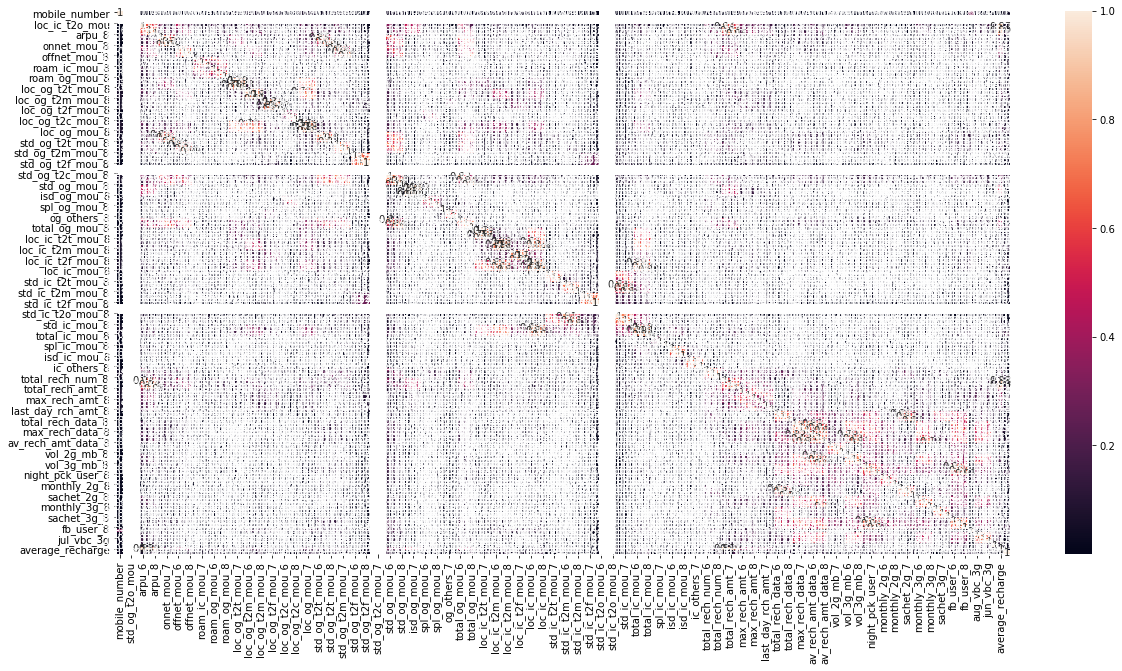

In [79]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_clean4.corr().abs(),annot = True)

In [89]:
corr = df_clean4.corr().abs()
corr.shape

(152, 152)

In [95]:
corr_triu = corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))
corr_triu.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_recharge,churn
mobile_number,NaN,NaN,NaN,NaN,0.014126,0.008967,0.018111,0.011386,0.014695,0.010953,0.000314,0.009779,0.000371,0.007450,0.003537,0.001728,0.000652,0.004968,0.007303,0.042633,0.041083,0.040382,0.075283,0.071038,0.075457,0.052050,0.052671,0.055019,0.018864,0.019892,0.014898,0.079112,0.075588,0.076893,0.037301,0.040162,0.033418,0.045681,0.049074,0.041874,0.027091,0.017938,0.020629,NaN,NaN,NaN,0.056135,0.060777,0.050754,0.004462,0.003499,0.004946,0.026847,0.029163,0.021913,0.016437,0.000704,0.000700,0.006163,0.01494,0.003527,0.027565,0.024521,0.026242,0.062121,0.057783,0.059356,0.052561,0.051944,0.051435,0.065650,0.061163,0.062263,0.007849,0.003228,0.007448,0.020754,0.021773,0.020891,0.014963,0.010601,0.013061,NaN,NaN,NaN,0.017329,0.015970,0.017848,0.053696,0.049183,0.050019,0.021318,0.002857,0.033991,0.011561,0.007852,0.005180,0.013494,0.012046,0.012992,0.046399,0.057819,0.049518,0.013581,0.013025,0.016227,0.057943,0.054267,0.057732,0.044745,0.051384,0.043447,0.013487,0.012387,0.006344,0.007439,0.006193,0.015767,0.000559,0.000564,0.009628,0.007572,0.013665,0.012097,0.013178,0.003235,0.000393,0.005529,0.001761,0.012896,0.014670,0.015869,0.013744,0.018433,0.016633,0.011463,0.002910,0.003045,0.014803,0.005949,0.006522,0.007856,0.007235,0.000510,0.010998,0.315102,0.024151,0.019990,0.031089,0.007637,0.014983,0.039227
loc_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [96]:
corr_triu = corr_triu.stack()
len(set(list(corr_triu[corr_triu > 0.2].to_frame().reset_index().level_1)))

131